# Exploratory Data Analysis: Test

In [10]:
# Import libraries for EDA 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import libraries for system configuration
import os 
import sys 

sys.path.append(os.path.abspath(".."))

This notebook is a test environment where new algorithms are being built and tested. 

## Approach

+ Descriptive Analysis
+ Univariate Analysis
+ Multivariate Analysis
+ Removal Nullvalue Analysis
+ Inconsistency Analysis

## Data Loading

In [11]:
# Import functionality 
from scripts.collection.collector import DataLoader

In [12]:
# Load the dataset
dataloader1 = DataLoader("Laptop_numerical_data.csv", "data/processed")
laptop_df1 = dataloader1.load()
laptop_df1

File accepted


,Price,Width of the Display,Height of the Display,Hard Drive Capacity,SSD Capacity,Ram Size,Processor Speed
0,303.80,2160.0,1440.0,512.0,1.0,8.0,3.8
1,400.00,1920.0,1080.0,2.0,NaN,NaN,4.2
2,175.00,1920.0,1080.0,500.0,500.0,16.0,2.4
3,85.00,1366.0,768.0,16.0,NaN,4.0,2.4
4,101.25,1366.0,768.0,NaN,256.0,8.0,1.4
...,...,...,...,...,...,...,...
4178,162.20,NaN,NaN,NaN,NaN,NaN,NaN
4179,93.25,NaN,NaN,NaN,NaN,NaN,NaN
4180,424.80,1920.0,1080.0,NaN,120.0,NaN,2.8
4181,90.94,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Analysis

+ Data Distribution: identifying number of samples 
+ Number of numerical and categorical features
+ Statistical summary: only for numerical features 

In [13]:
# Identify dataset
laptop_df1.info()
laptop_df1.dtypes
laptop_df1.isnull().sum()
laptop_df1.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 0 to 4182
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  4183 non-null   float64
 1   Width of the Display   1915 non-null   float64
 2   Height of the Display  1915 non-null   float64
 3   Hard Drive Capacity    1104 non-null   float64
 4   SSD Capacity           2127 non-null   float64
 5   Ram Size               1652 non-null   float64
 6   Processor Speed        2090 non-null   object 
dtypes: float64(6), object(1)
memory usage: 261.4+ KB


Price                    2014
Width of the Display       27
Height of the Display      28
Hard Drive Capacity        34
SSD Capacity               23
Ram Size                   18
Processor Speed            77
dtype: int64

In [14]:
# Identify laptop: build a dataset with all possible identified parameters: nullvalues, dtypes, features, number of unique values
descr_df = pd.DataFrame()

descr_df["Features"] = laptop_df1.columns.tolist()
descr_df["Nullvalues"] = laptop_df1.isnull().sum().values
descr_df["DataTypes"] = laptop_df1.dtypes.values
descr_df["UniqueValues"] = laptop_df1.nunique().values

targets = {x:y for x,y in zip(descr_df.drop(columns=["Features","DataTypes"], axis=1).columns, 
                              descr_df.drop(columns=["Features","DataTypes"], axis=1).values.transpose())}
for x, y in targets.items():
    print(x, y)




Nullvalues [   0 2268 2268 3079 2056 2531 2093]
UniqueValues [2014   27   28   34   23   18   77]


graph 1

In [34]:

# # Set up variables
# features = descr_df["Features"].to_numpy()
# targets = {x: y for x, y in zip(
#     descr_df.drop(columns=["Features","DataTypes"], axis=1).columns,
#     descr_df.drop(columns=["Features","DataTypes"], axis=1).values.transpose()
# )}

# # Now x should correspond to features (not targets)
# x = np.arange(len(features))  # label locations for features
# width = 0.25
# multiplier = 0

# fig, ax = plt.subplots(layout="constrained", figsize=(10,8))

# # Draw grouped bars
# for attribute, measurement in targets.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1

# # Axis and legend
# ax.set_ylabel('Counts')
# ax.set_title('Descriptive statistics per feature')
# ax.set_xticks(x + width, features, rotation=45)
# ax.legend(loc='upper left', ncols=len(targets))
# ax.set_ylim(0, max([max(v) for v in targets.values()]) * 1.1)

# plt.show()


**graph 2**: useful for code implemntation

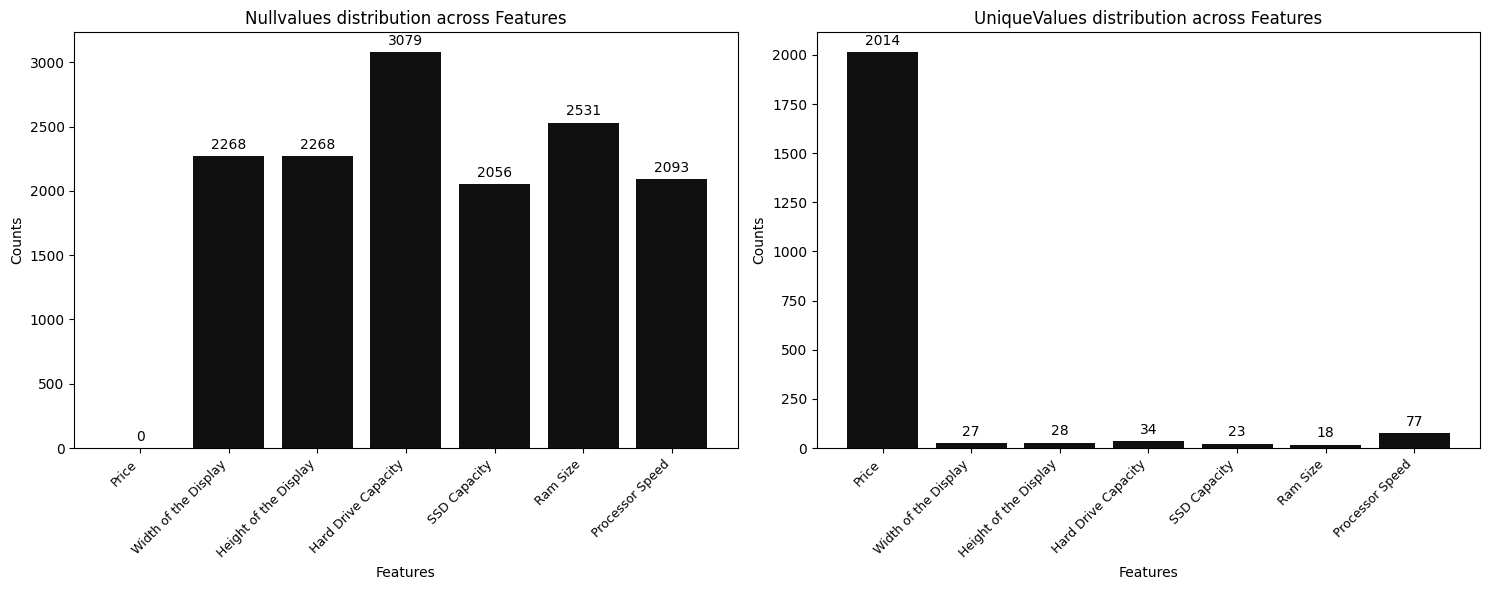

In [33]:
# Initialise variables for building descriptive barcharts
features = descr_df["Features"].to_numpy()
targets = {x:y for x,y in zip(descr_df.drop(columns=["Features","DataTypes"], axis=1).columns, 
                              descr_df.drop(columns=["Features","DataTypes"], axis=1).values.transpose())}
descr_params = ["Nullvalues", "UniqueValues"]
descr_params_len = len(descr_params)

# Create subplots 
fig, ax = plt.subplots(1,descr_params_len, figsize=(15,6))

# Draw bars using numeric positions
for i, descr_param in zip(list(range(descr_params_len)), descr_params):
    x = np.arange(len(features))
    rects = ax[i].bar(x, targets[descr_param], color="black", alpha=0.75)

    ax[i].bar(features, targets[descr_param], color="black", alpha=0.75)
    ax[i].set_xlabel("Features")
    ax[i].set_ylabel("Counts")
    ax[i].set_title(f"{descr_param} distribution across Features")

    # add numeric labels above each bar
    ax[i].bar_label(rects, padding=3, fmt="%d")

    # Set tick positions and labels, rotate and align to avoid overlap
    # Set tick positions and labels, rotate and align to avoid overlap
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(features, rotation=45, ha="right", fontsize=9)

fig.tight_layout()

In [41]:
descr_columns = [c for c in descr_df.columns]
print(descr_columns)

for column in descr_columns:
    check_column = column 
    if not pd.api.types.is_numeric_dtype(descr_df[check_column]):
        descr_columns.remove(check_column)

print(descr_columns)

['Features', 'Nullvalues', 'DataTypes', 'UniqueValues']
['Nullvalues', 'UniqueValues']
